## Exploratory Data Analysis (EDA)

This notebook will cover data loading, initial exploration, visualization, and some basic insights.

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [35]:
# Load the dataset
data_path = '../data/raw/hour.csv'
df = pd.read_csv(data_path)

In [36]:
# Display the first few rows of the dataset
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [37]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [38]:
# Summary statistics
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [39]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columsn in the dataset.')

There are 17379 rows and 17 columsn in the dataset.


In [40]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


---

### Data Visulization

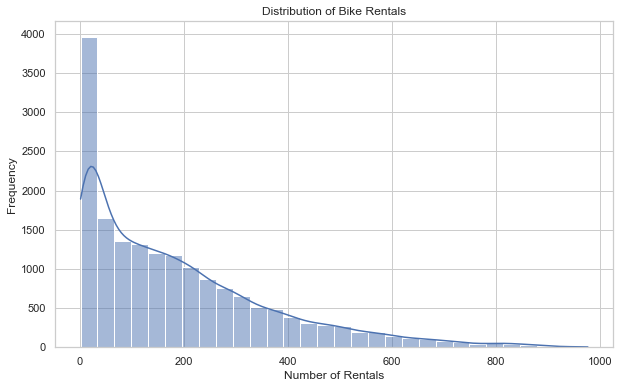

In [41]:
# Distribution of the target variable (e.g., number of bike rentals)
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Convert datetime to pandas datetime object
df['dteday'] = pd.to_datetime(df['dteday'])

In [43]:
# Time series analysis
# Extract day, month from datetime
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['dayofweek'] = df['dteday'].dt.dayofweek

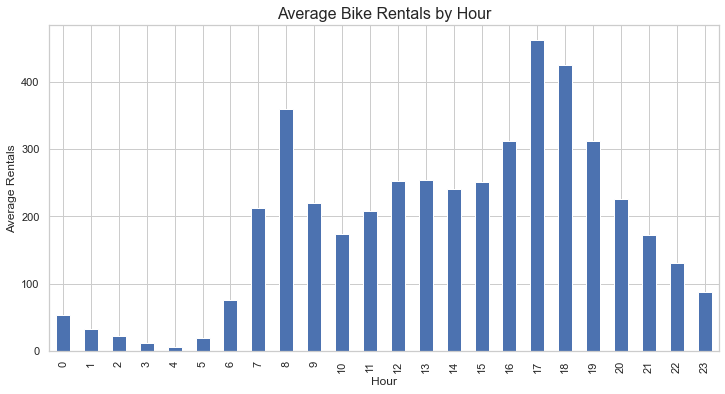

In [48]:
# Plot bike rentals by hour
hourly_rentals = df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(12,6))
hourly_rentals.plot(kind='bar')
plt.title('Average Bike Rentals by Hour',fontsize=16)
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.show()

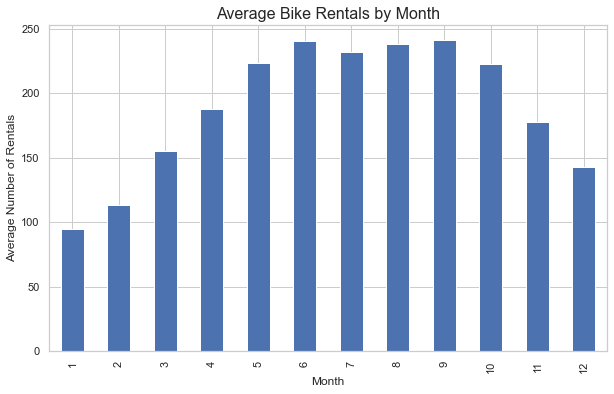

In [47]:
monthly_rentals = df.groupby('mnth')['cnt'].mean()

plt.figure(figsize=(10, 6))
monthly_rentals.plot(kind='bar')
plt.title('Average Bike Rentals by Month',fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Number of Rentals')
plt.show()

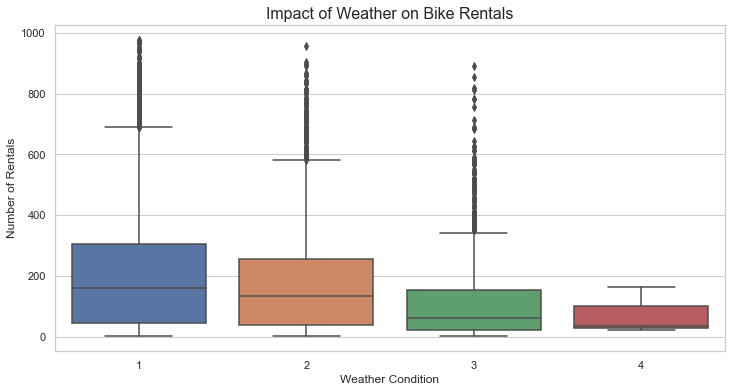

In [52]:
# Impact of weather on bike rentals
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Impact of Weather on Bike Rentals',fontsize=16)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Rentals')
plt.show()

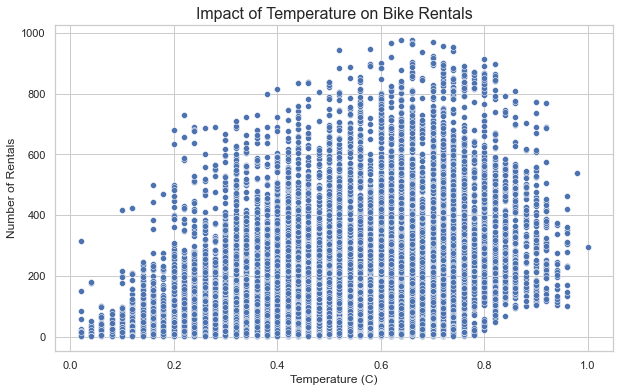

In [54]:
# Impact of temperature on bike rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Impact of Temperature on Bike Rentals',fontsize=16)
plt.xlabel('Temperature (C)')
plt.ylabel('Number of Rentals')
plt.show()

In [56]:
# Save the cleaned and processed data for further analysis
processed_data_path = '../data/processed/bike_sharing_data_processed.csv'
df.to_csv(processed_data_path)

In [55]:
# Conclusion of EDA
print("EDA completed. The processed data has been saved for further analysis.")

EDA completed. The processed data has been saved for further analysis.
